In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Importing Libraries & Load the file

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy
import os
import cv2

In [ ]:
# Reading Dataset
data = pd.read_csv('/content/drive/MyDrive/DL Project/fer2013.csv')
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


In [ ]:
# Checking Shape of data
data.shape

(35887, 3)

## 2. Data Visualization

In [ ]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
label_to_text

{0: 'anger',
 1: 'disgust',
 2: 'fear',
 3: 'happiness',
 4: 'sadness',
 5: 'surprise',
 6: 'neutral'}

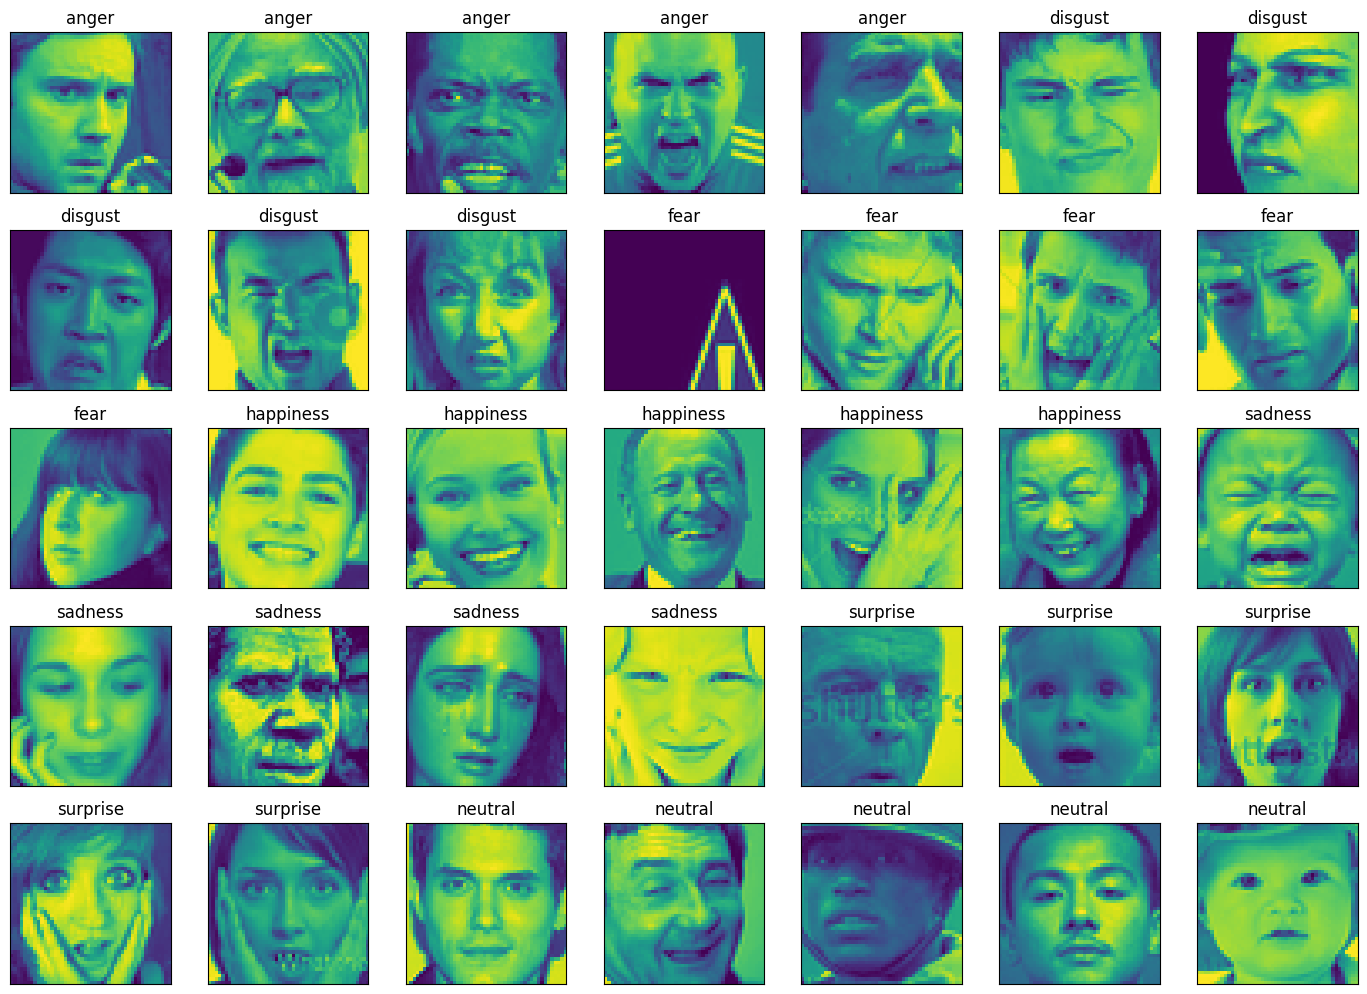

In [ ]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(data.emotion.unique()):
    for j in range(5):
        px = data[data.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        plt.tight_layout()

In [ ]:
# Checking Emotion Class Distribution
data['emotion'].value_counts()

,count
emotion,
3,8989
6,6198
4,6077
2,5121
0,4953
5,4002
1,547


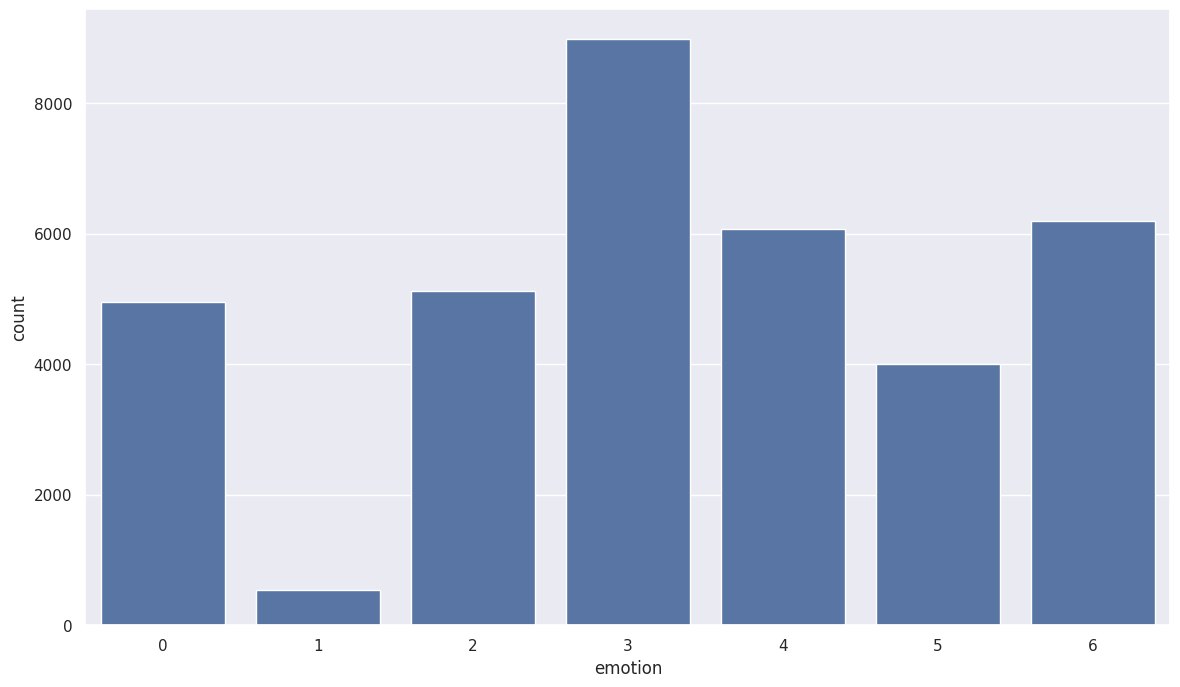

In [ ]:
# Plotting the above distribution
plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

*From the above chart, we can observe that the data is highly imbalnace and for some emotions we have very small number of images, so we need to balnce the data by oversampling technique, so to that enough number of images for every emotions(class).*

## 3. Data Pre-processing (Balancing & Preparation)

In [ ]:
# Split the data into feature & target variable
x_data = data['pixels']
y_data = data['emotion']

In [ ]:
# Perform Random Over Sampling to balance the data
oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(62923, 1)   (62923,)


In [ ]:
# Let's check the distributio of target data again after balancing
y_data.value_counts()

,count
emotion,
0,8989
2,8989
4,8989
6,8989
3,8989
5,8989
1,8989


In [ ]:
x_data = pd.Series(x_data.flatten())
x_data

,0
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,151 150 147 155 148 133 111 140 170 174 182 15...
2,231 212 156 164 174 138 161 173 182 200 106 38...
3,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...
62918,10 9 10 11 9 10 9 10 19 20 20 22 28 68 182 209...
62919,65 59 53 58 57 51 62 79 81 84 90 100 101 108 1...
62920,10 9 8 11 11 16 17 20 15 15 18 28 30 25 17 12 ...
62921,46 41 46 49 39 8 0 1 2 1 2 5 9 13 13 10 13 15 ...


In [ ]:
# Split the data into feature & target variable
x_data = data['pixels']
y_data = data['emotion']
# Perform Random Over Sampling to balance the data
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto')

x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)
# Let's check the distributio of target data again after balancing
y_data.value_counts()
x_data = pd.Series(x_data.flatten())
x_data
# Normalize the data
# Instead of converting directly to np.array, we will first convert each pixel string to a 48x48 array
# Then, we stack the arrays together.
def string_to_array(pixel_string):
    # Split the string into individual pixel values
    pixels = np.array(pixel_string.split(), dtype=np.float32)
    # Reshape into a 48x48 array
    pixels = pixels.reshape((48, 48))
    return pixels

x_data = np.stack(x_data.apply(string_to_array)) # Apply the function to each string in x_data and stack them.

x_data/=255 # Normalize
print(x_data.shape)
x_data[:10]

(62923, 1)   (62923,)
(62923, 48, 48)


array([[[0.27450982, 0.3137255 , 0.32156864, ..., 0.20392157,
         0.16862746, 0.16078432],
        [0.25490198, 0.23921569, 0.22745098, ..., 0.21960784,
         0.20392157, 0.17254902],
        [0.19607843, 0.16862746, 0.21176471, ..., 0.19215687,
         0.21960784, 0.18431373],
        ...,
        [0.35686275, 0.25490198, 0.16470589, ..., 0.28235295,
         0.21960784, 0.16862746],
        [0.3019608 , 0.32156864, 0.30980393, ..., 0.4117647 ,
         0.27450982, 0.18039216],
        [0.3019608 , 0.28235295, 0.32941177, ..., 0.41568628,
         0.42745098, 0.32156864]],

       [[0.5921569 , 0.5882353 , 0.5764706 , ..., 0.5058824 ,
         0.54901963, 0.47058824],
        [0.5921569 , 0.58431375, 0.58431375, ..., 0.47843137,
         0.5529412 , 0.5372549 ],
        [0.5921569 , 0.5921569 , 0.6117647 , ..., 0.42745098,
         0.48235294, 0.57254905],
        ...,
        [0.7372549 , 0.7372549 , 0.4745098 , ..., 0.7254902 ,
         0.7254902 , 0.7294118 ],
        [0.7

In [ ]:
# Reshaping
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape

(62923, 48, 48, 1)

In [ ]:
y_data = np.array(y_data)
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

In [ ]:
# Split the data and create train-test set
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state = 45)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((56630, 48, 48, 1), (6293, 48, 48, 1), (56630, 1), (6293, 1))

In [ ]:
# Perform One-Hot Encoding on training data
y_train = to_categorical(y_train, 7)
y_train.shape

(56630, 7)

In [ ]:
# Perform One-Hot Encoding on test data
y_test = to_categorical(y_test, 7)
y_test.shape

(6293, 7)

## 4. Model Building

In [ ]:
model = Sequential([
    # 1st Conv Layer
    Input((48, 48, 1)),
    Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Dropout(0.25),

    # 2nd Conv Layer
    Conv2D(64, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # 3rd Conv Layer
    Conv2D(64, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    Dropout(0.25),

    # 4th Conv Layer
    Conv2D(128, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # 5th Conv Layer
    Conv2D(128, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),

    # Flattening the Layer
    Flatten(),

    # Hidden Layer
    Dense(250, activation='relu'),
    Dropout(0.5),

    # Output Layer
    Dense(7, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 21, 21, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │              

 Total params: 792,855 (3.02 MB)

 Trainable params: 792,023 (3.02 MB)

 Non-trainable params: 832 (3.25 KB)

## 5. Model Training

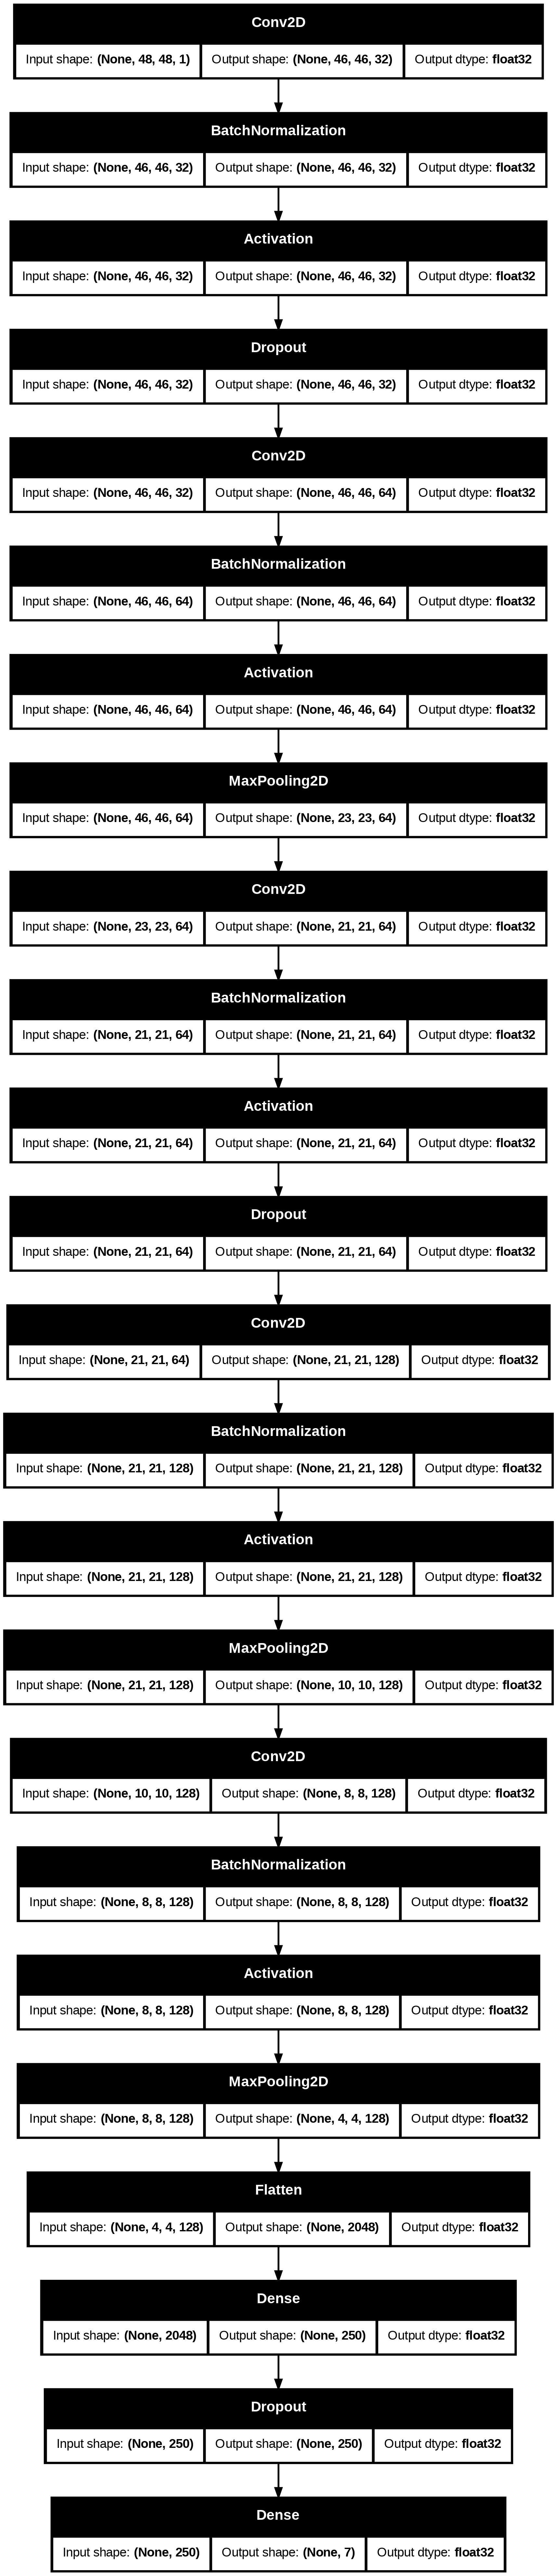

In [ ]:
# Model Flowchart
tf.keras.utils.plot_model(model, to_file = "/content/drive/MyDrive/DL Project/best_model.png", show_shapes = True, show_dtype = True)

In [ ]:
# Compile the Model
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the Model
history = model.fit(x_train, y_train, epochs = 35, validation_data=(x_test, y_test))

Epoch 1/35
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.2260 - loss: 1.9587 - val_accuracy: 0.3262 - val_loss: 1.7306
Epoch 2/35
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.3904 - loss: 1.5913 - val_accuracy: 0.4373 - val_loss: 1.4711
Epoch 3/35
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4659 - loss: 1.4053 - val_accuracy: 0.5191 - val_loss: 1.2723
Epoch 4/35
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.5169 - loss: 1.2793 - val_accuracy: 0.5652 - val_loss: 1.1557
Epoch 5/35
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.5473 - loss: 1.1924 - val_accuracy: 0.5819 - val_loss: 1.0920
Epoch 6/35
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5803 - loss: 1.1136 - val_accuracy: 0.6072 - val_loss: 1.0174
Epoch 7/35
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6033 - loss: 1.0512 - val_accuracy: 0.6121 - val_loss: 0.9933
Epoch 8/35
1770/1770 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6219 -

## 6. Model Evaluation

In [ ]:
print("Accuracy of our model on test data : " , model.evaluate(x_test, y_test)[1]*100 , "%")
print("Loss of our model on test data : " , model.evaluate(x_test, y_test)[0])

197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8195 - loss: 0.6412
Accuracy of our model on test data :  81.85285329818726 %
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8195 - loss: 0.6412
Loss of our model on test data :  0.6075649857521057


***The test accuracy & loss of our model is 81.31% & 0.605 respectively, which is better than many exsited state-of-the-art results.***

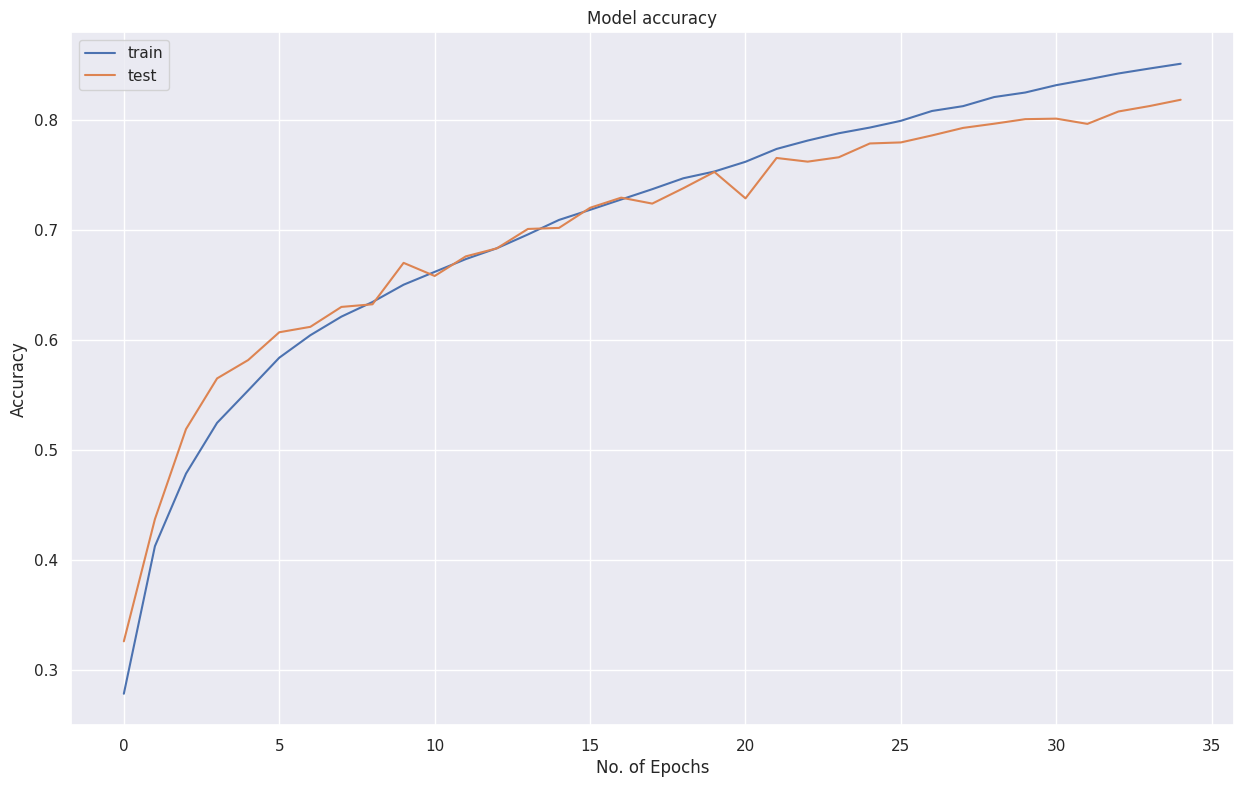

In [ ]:
plt.figure(figsize=(15, 9))

# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

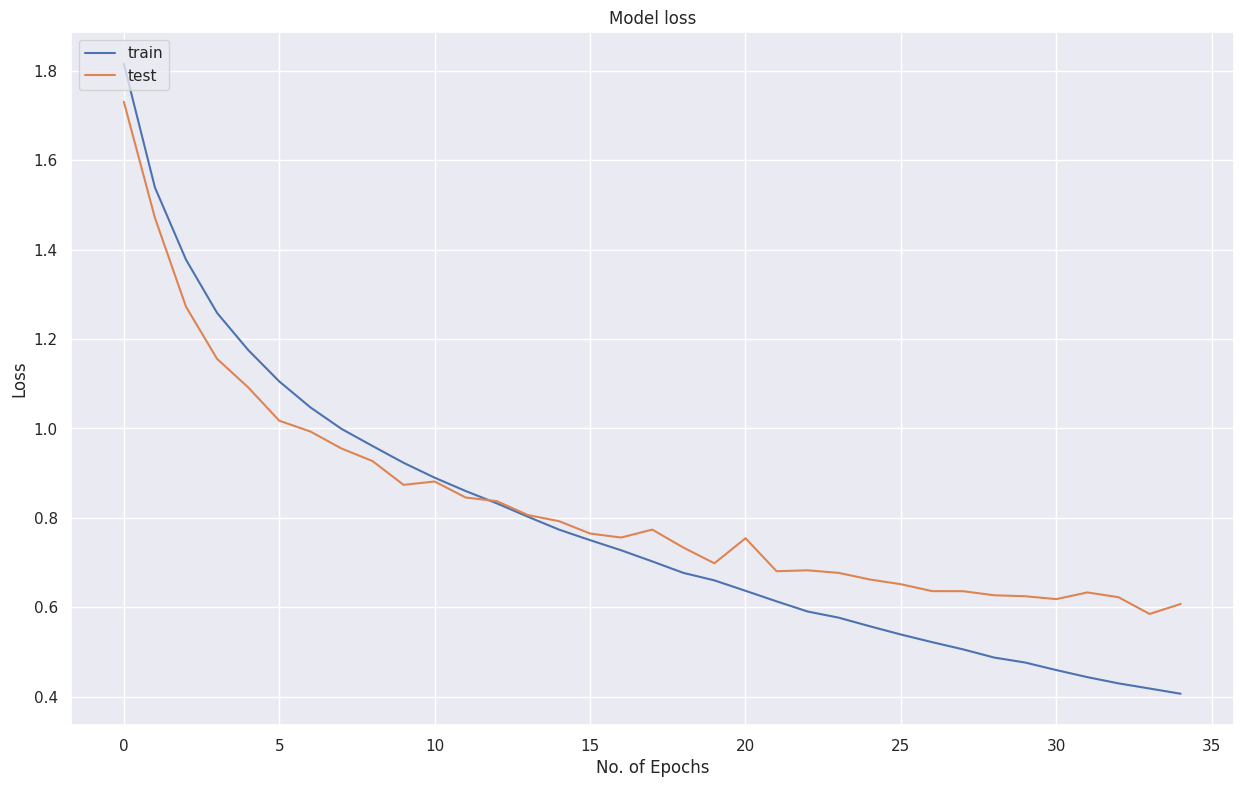

In [ ]:
plt.figure(figsize=(15, 9))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 7. Getting Classification Report & Plotting Confusion Matrix

In [ ]:
# Making Predictio on Test Data
y_pred = model.predict(x_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


[6, 5, 5, 6, 1, 0, 3, 4, 1, 6]

In [ ]:
y_actual = []

for pred in y_test:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[6, 5, 5, 6, 1, 0, 3, 4, 1, 3]

In [ ]:
# Getting Classification Report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80       935
           1       0.99      1.00      1.00       895
           2       0.79      0.74      0.77       880
           3       0.82      0.84      0.83       906
           4       0.65      0.76      0.70       888
           5       0.94      0.92      0.93       869
           6       0.71      0.74      0.73       920

    accuracy                           0.82      6293
   macro avg       0.83      0.82      0.82      6293
weighted avg       0.82      0.82      0.82      6293



Text(178.75, 0.5, 'Truth')

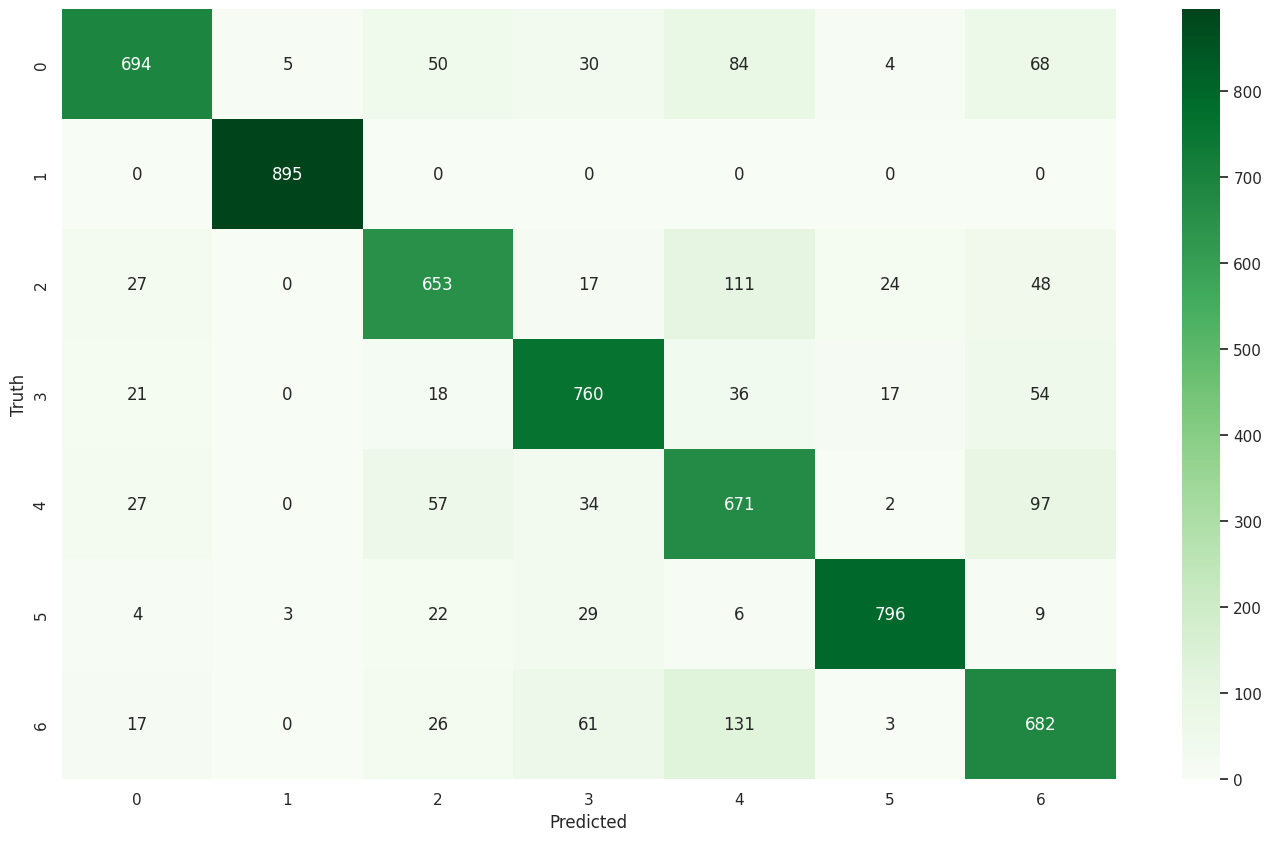

In [ ]:
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (17, 10))
sns.heatmap(cm, annot = True, fmt = 'd', cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **8. Save the Model**

In [ ]:
# Save the Model
model.save("/content/drive/MyDrive/DL Project/Facial_Expression_Detection_System.hdf5")

In [ ]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("/content/drive/MyDrive/DL Project/Facial Expression Recognition.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("/content/drive/MyDrive/DL Project/fer.weights.h5")

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Ensure correct variable names
X_train, X_test = x_train, x_test

# Convert one-hot encoded labels back to numerical for SVM and RF
y_train_numeric = np.argmax(y_train, axis=1)
y_test_numeric = np.argmax(y_test, axis=1)

# Flatten image data for SVM and Random Forest
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply PCA for feature reduction (optimized for better accuracy)
pca = PCA(n_components=100)  # Increased from 50 to 100 for better feature retention
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Normalize data for better SVM & RF performance
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

# Use more training samples for SVM
X_train_sample = X_train_pca[:10000]  # Increased from 5000 to 10000 samples
y_train_sample = y_train_numeric[:10000]

# Train SVM with optimized hyperparameters
svm_model = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_sample, y_train_sample)
svm_predictions = svm_model.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test_numeric, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

# Train Random Forest with more trees and depth optimization
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
rf_model.fit(X_train_pca, y_train_numeric)
rf_predictions = rf_model.predict(X_test_pca)
rf_accuracy = accuracy_score(y_test_numeric, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# CNN Accuracy Calculation
cnn_predictions = np.argmax(model.predict(X_test), axis=1)
cnn_accuracy = accuracy_score(y_test_numeric, cnn_predictions)
print(f"CNN Accuracy: {cnn_accuracy:.4f}")


SVM Accuracy: 0.4804
Random Forest Accuracy: 0.8023
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CNN Accuracy: 0.8185
